<figure style="float:right">
<a href="http://c51.lbl.gov/~walkloud/callat/">
    <img
    src="./data/callat_logo.png"
    width="150"
    alt="CalLat logo"
    /img>
</a>
</figure>

# Jupyter notebook for CalLat 0vbb project 

In [1]:
import sys
import pandas as pd
import numpy as np
import gvar as gv
import lsqfit
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import scipy.special as spsp
print("python version:", sys.version)
print("pandas version:", pd.__version__)
print("numpy  version:", np.__version__)
print("scipy  version:", sp.__version__)
print("lsqfit version:", lsqfit.__version__)
print("gvar   version:", gv.__version__)

python version: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
pandas version: 0.20.1
numpy  version: 1.14.2
scipy  version: 1.0.1
lsqfit version: 9.3
gvar   version: 8.3.6


# input parameters

In [2]:
params = dict()
params['save_fig']=True
#
params['ensembles'] = ['l1648f211b580m013m065m838','l2448f211b580m0064m0640m828',\
                       'l2464f211b600m0102m0509m635','l2464f211b600m00507m0507m628','l3264f211b600m00507m0507m628','l4064f211b600m00507m0507m628','l4864f211b600m00184m0507m628',\
                       'l3296f211b630m0074m037m440','l4896f211b630m00363m0363m430']
params['operators'] = ['LR','LR_colormix','S','S_colormix','V']
params['ansatz'] = 'chipt'
params['order'] = 2
params['fv_flag'] = True
params['ma_flag'] = False
params['alphas_flag'] = False
# priors
priors = dict()
N0LO = 10.0
N1LO = 10.0
N2LO = 12.0 #This width was chosen from a Bayes study, maximizing the logBayesFactor
# O3
priors['b0.V'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.V'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.V'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.V'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.V'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.V'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.V'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O1
priors['b0.LR'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.LR'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.LR'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.LR'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.LR'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.LR'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.LR'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O2
priors['b0.LR_colormix'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.LR_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.LR_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.LR_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.LR_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.LR_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.LR_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O4
priors['b0.S'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.S'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.S'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.S'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.S'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.S'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.S'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed
# O5
priors['b0.S_colormix'] = gv.gvar(0.0,N0LO*1.0) # LO LEC
priors['c1.S_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO counterterm
priors['a1.S_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO symanzik
priors['s1.S_colormix'] = gv.gvar(0.0,N1LO*1.0) # NLO one-loop
priors['c2.S_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO counterterm
priors['a2.S_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO symanzik
priors['m2.S_colormix'] = gv.gvar(0.0,N2LO*1.0) # N2LO mixed

# Physical parameters from PDG
physical_params = dict()
# http://pdg.lbl.gov/2016/tables/rpp2016-tab-mesons-light.pdf
physical_params['mpi'] = gv.gvar(0.13957018, 0.00000035) # mpi +/- [GeV]
# http://pdg.lbl.gov/2016/reviews/rpp2016-rev-pseudoscalar-meson-decay-cons.pdf
physical_params['Fpi'] = gv.gvar(0.1302, 0.0017)/np.sqrt(2) # Fpi + ['GeV']
# https://journals.aps.org/prd/abstract/10.1103/PhysRevD.93.094510
# https://arxiv.org/pdf/1503.02769.pdf
physical_params['w0'] = gv.gvar(0.1714,0.0015)

# plot parameters
plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{helvet}',
    r'\usepackage{sansmath}',
    r'\sansmath']
plot_params = dict()
scale = 4.0
plot_params['ms'] = str(scale*3)
plot_params['cs'] = scale*3
plot_params['fs_l'] = scale*7
plot_params['fs_xy'] = scale*7
plot_params['ts'] = scale*7
plot_params['lw'] = scale*0.5
gr = 1.618034333
fs2_base = scale*3.50394
plot_params['fig_size2'] = (fs2_base,fs2_base/gr)
fs3_base = scale*3.50394
plot_params['fig_size3'] = (fs3_base,fs3_base/gr)
plot_params['plt_axes'] = [0.14,0.13,0.825,0.825]
plot_params['op_color'] = {'V':'#c82506',\
                           'LR':'#70b741', 'LR_colormix':'#0b5d12',\
                           'S': '#51a7f9', 'S_colormix':'#00397a'}
plot_params['alat_color'] = {'a15':'#c82506','a12':'#70b741','a09':'#51a7f9'}
plot_params['mpi_shape'] = {'m130':'o', 'm220':'^', 'm310':'s'}
plot_params['a_shape'] = {'a09':'H', 'a12':'d', 'a15':'s'}
plt.rc('text', usetex=True)
plt.rc('font', size=plot_params['fs_xy']) # for sci notation

# read data

In [3]:
data_0vbb = pd.read_csv('./data/n0bb_v3.csv')
#data_0vbb.groupby(['hisq_ensembles','operator']).describe()['result']

In [4]:
data_mm = pd.read_csv('./data/phi_ju.csv')
#data_mm.groupby(['ensemble']).describe()['E0']

In [5]:
hisq_parameters = pd.read_csv('./data/hisq_params.csv')
#hisq_parameters

# useful functions

In [6]:
a015 = ['l1648f211b580m013m065m838','l2448f211b580m0064m0640m828','l3248f211b580m00235m0647m831']
a012 = ['l2464f211b600m0102m0509m635',\
        'l2464f211b600m00507m0507m628','l3264f211b600m00507m0507m628','l4064f211b600m00507m0507m628',\
        'l4864f211b600m00184m0507m628']
a009 = ['l3296f211b630m0074m037m440','l4896f211b630m00363m0363m430']
def e2s():
    ensemble_to_spacing=dict({i:'a15' for i in a015})
    ensemble_to_spacing.update({i:'a12' for i in a012})
    ensemble_to_spacing.update({i:'a09' for i in a009})
    return ensemble_to_spacing
m310 = ['l1648f211b580m013m065m838','l2464f211b600m0102m0509m635','l3296f211b630m0074m037m440']
m220 = ['l2448f211b580m0064m0640m828',\
        'l2464f211b600m00507m0507m628','l3264f211b600m00507m0507m628','l4064f211b600m00507m0507m628',\
        'l4896f211b630m00363m0363m430']
m130 = ['l3248f211b580m00235m0647m831','l4864f211b600m00184m0507m628']
def e2m():
    ensemble_to_mpi=dict({i:'m310' for i in m310})
    ensemble_to_mpi.update({i:'m220' for i in m220})
    ensemble_to_mpi.update({i:'m130' for i in m130})
    return ensemble_to_mpi
def o2i():
    operator_to_index = {'V':0,'LR':1,'LR_colormix':2,'S':3,'S_colormix':4}
    return operator_to_index
lbl = {e:None for e in params['ensembles']}
lbl['l1648f211b580m013m065m838'] = r'$a\sim0.15$\textrm{ fm}'
lbl['l2464f211b600m0102m0509m635'] = r'$a\sim0.12$\textrm{ fm}'
lbl['l3296f211b630m0074m037m440'] = r'$a\sim0.09$\textrm{ fm}'
print(lbl)
lec_to_latex = {
    'b0.V':r'$\beta_3$','c1.V':r'$c_3$',
    'b0.LR':r'$\beta_1$','c1.LR':r'$c_1$',
    'b0.LR_colormix':r'$\beta_1^\prime$','c1.LR_colormix':r'$c_1^\prime$',
    'b0.S':r'$\beta_2$','c1.S':r'$c_2$',
    'b0.S_colormix':r'$\beta_2^\prime$','c1.S_colormix':r'$c_2^\prime$',    
}

{'l1648f211b580m013m065m838': '$a\\sim0.15$\\textrm{ fm}', 'l2448f211b580m0064m0640m828': None, 'l2464f211b600m0102m0509m635': '$a\\sim0.12$\\textrm{ fm}', 'l2464f211b600m00507m0507m628': None, 'l3264f211b600m00507m0507m628': None, 'l4064f211b600m00507m0507m628': None, 'l4864f211b600m00184m0507m628': None, 'l3296f211b630m0074m037m440': '$a\\sim0.09$\\textrm{ fm}', 'l4896f211b630m00363m0363m430': None}


# Renormalization matrix

In [7]:
dzmat = dict()
dzmat['a15'] = gv.gvar([['0.9407(63)',       '0(0)',       '0(0)',       '0(0)',       '0(0)'],\
                        [      '0(0)', '0.9835(68)','-0.0106(18)',       '0(0)',       '0(0)'],\
                        [      '0(0)','-0.0369(30)', '1.0519(80)',       '0(0)',       '0(0)'],\
                        [      '0(0)',       '0(0)',       '0(0)',  '1.020(11)','-0.0356(49)'],\
                        [      '0(0)',       '0(0)',       '0(0)','-0.0485(31)', '0.9519(68)']])

dzmat['a12'] = gv.gvar([['0.9117(43)',       '0(0)',       '0(0)',       '0(0)',       '0(0)'],\
                        [      '0(0)', '0.9535(48)','-0.0130(17)',       '0(0)',       '0(0)'],\
                        [      '0(0)','-0.0284(30)', '0.9922(60)',       '0(0)',       '0(0)'],\
                        [      '0(0)',       '0(0)',       '0(0)', '0.9656(96)','-0.0275(49)'],\
                        [      '0(0)',       '0(0)',       '0(0)','-0.0360(28)', '0.9270(50)']])

dzmat['a09'] = gv.gvar([['0.9017(39)',       '0(0)',       '0(0)',       '0(0)',       '0(0)'],\
                        [      '0(0)', '0.9483(44)','-0.0269(17)',       '0(0)',       '0(0)'],\
                        [      '0(0)','-0.0236(29)', '0.9369(54)',       '0(0)',       '0(0)'],\
                        [      '0(0)',       '0(0)',       '0(0)', '0.9209(91)','-0.0224(49)'],\
                        [      '0(0)',       '0(0)',       '0(0)','-0.0230(28)', '0.9332(47)']])
# V LR LR_colormix S S_colormix
# O3 O1 O2 O4 O5
ensemble_to_spacing = e2s()
operator_to_index = {'V':0,'LR':1,'LR_colormix':2,'S':3,'S_colormix':4}
def zmat(ensemble,operator_list):
    alat = ensemble_to_spacing[ensemble]
    operator_index = [operator_to_index[op] for op in operator_list]
    return dzmat[alat][np.ix_(operator_index,operator_index)]
# test
zmat('l1648f211b580m013m065m838',['V','LR','S'])

array([[0.9407(63), 0(0), 0(0)],
       [0(0), 0.9835(68), 0(0)],
       [0(0), 0(0), 1.020(11)]], dtype=object)

# Compile data

In [8]:
# 0vbb data
dict_0vbb = {(ens,op): -1.*data_0vbb.query("hisq_ensembles=='%s' and operator=='%s' and fit_n==1"%(ens,op))\
             .sort_values('nbs')['result'].as_matrix()\
             for ens in params['ensembles']\
             for op in params['operators']}
dict_0vbb.update({(ens,'epi'): data_0vbb.query("hisq_ensembles=='%s' and operator=='epi' and fit_n==1" %(ens))\
          .sort_values('nbs')['result'].as_matrix()\
          for ens in params['ensembles']})
dict_0vbb.update({(ens,'fpi'): 1./data_0vbb.query("hisq_ensembles=='%s' and operator=='fpi' and fit_n==0" %(ens))\
          .sort_values('nbs')['result'].as_matrix()\
          for ens in params['ensembles']})
gv_0vbb = gv.dataset.avg_data(dict_0vbb,bstrap=True)
# split data from prior
gv_y = {(ens,op):gv_0vbb[(ens,op)] for ens in params['ensembles'] for op in params['operators']}
gv_efpi = {(ens,op):gv_0vbb[(ens,op)] for ens in params['ensembles'] for op in ['epi','fpi']}
# 
dict_gVmm = {(ens,'phi_ju'): data_mm.query("ensemble=='%s'" %(ens)).sort_values('nbs')['E0'].as_matrix()\
                for ens in params['ensembles']}
dict_gVmm[('l2464f211b600m00507m0507m628','phi_ju')] = data_mm.query("ensemble=='l3264f211b600m00507m0507m628'").sort_values('nbs')['E0'].as_matrix()
dict_gVmm[('l4064f211b600m00507m0507m628','phi_ju')] = data_mm.query("ensemble=='l3264f211b600m00507m0507m628'").sort_values('nbs')['E0'].as_matrix()
gv_gVmm = gv.dataset.avg_data(dict_gVmm,bstrap=True)
gv_mm = {(ens,'phi_ju'):gv_gVmm[(ens,'phi_ju')] for ens in params['ensembles']}
#
gv_hisq = dict()
for ens in params['ensembles']:
    hp_ens = hisq_parameters.query("ensemble=='%s'" %(ens))
    gv_hisq[(ens,'aw0')] = gv.gvar(hp_ens['aw0_mean'].as_matrix()[0],hp_ens['aw0_sdev'].as_matrix()[0])
    gv_hisq[(ens,'r2di')] = gv.gvar(hp_ens['r2DI_mean'].as_matrix()[0],hp_ens['r2DI_sdev'].as_matrix()[0])
    gv_hisq[(ens,'r1a')] = gv.gvar(hp_ens['r1a_mean'].as_matrix()[0],hp_ens['r1a_sdev'].as_matrix()[0])
gv_hisq.update({(ens,'a2di'):gv_hisq[(ens,'r2di')]/gv_hisq[(ens,'r1a')]**2 for ens in params['ensembles']})
# renormalize y
gv_rey = dict()
for ens in params['ensembles']:
    melem = np.array([gv_y[(ens,op)] for op in params['operators']])
    rmatrix = zmat(ens,params['operators'])
    relem = rmatrix.dot(melem.T)
    for idx,op in enumerate(params['operators']):
        gv_rey[(ens,op)] = relem[idx]/gv_hisq[(ens,'aw0')]**4 # convert data to w0 units

# make x
x = [[ens, op] for ens in params['ensembles'] for op in params['operators']]

# make p
def filter_priors(key):
    if (int(key[1]) <= params['order'] and key.split('.')[1] in params['operators']):
        pfilter = True
    else: pfilter = False
    if key.split('.')[0][0] in ['s'] and not params['alphas_flag']:
        pfilter = False
    return pfilter
gv_p = {key:priors[key] for key in priors.keys()\
        if filter_priors(key)}
gv_p.update(gv_efpi)
gv_p.update({(ens,'ema'):gv_mm[(ens,'phi_ju')]/(4.*np.pi*gv_efpi[(ens,'fpi')]) for ens in params['ensembles']})
gv_p.update({(ens,'epq2'):gv_hisq[(ens,'a2di')]/(4.*np.pi*gv_efpi[(ens,'fpi')])**2 for ens in params['ensembles']})
gv_p.update({(ens,'ea2'):gv_hisq[(ens,'aw0')]**2/(4.*np.pi) for ens in params['ensembles']})
# make variables for fit class initialization
ini = dict()
for ens in params['ensembles']:
    ini[(ens,'alpha_s')] = hisq_parameters.query("ensemble=='%s'" %(ens))['alfs'].as_matrix()[0]
    ini[(ens,'mpiL')] = (float(ens[1:3])*gv_p[(ens,'epi')]*4.*np.pi*gv_p[(ens,'fpi')]).mean
    ini[(ens,'mmaL')] = (float(ens[1:3])*gv_mm[(ens,'phi_ju')]).mean

# DEBUG CELL

In [9]:
short_name={
    'l1648f211b580m013m065m838':'a15m310 ',
    'l2448f211b580m0064m0640m828':'a15m220 ',
    'l2464f211b600m0102m0509m635':'a12m310 ',
    'l2464f211b600m00507m0507m628':'a12m220S',
    'l3264f211b600m00507m0507m628':'a12m220 ',
    'l4064f211b600m00507m0507m628':'a12m220L',
    'l4864f211b600m00184m0507m628':'a12m130 ',
    'l3296f211b630m0074m037m440':'a09m310 ',
    'l4896f211b630m00363m0363m430':'a09m220'
}
if False:
    for i,ens in enumerate(params['ensembles']):
        print(gv_gV[(ens,'gV')],short_name[ens])
if False:
    for i,ens in enumerate(params['ensembles']):
        print("%.5f +- %.5f" %(dict_0vbb[(ens,'epi')].mean(),dict_0vbb[(ens,'epi')].std()),short_name[ens])
if False:
    x_epi=[dict_0vbb[(ens,'epi')].mean() for ens in params['ensembles']]
    aLam = [4.*np.pi*dict_0vbb[(ens,'fpi')].mean() for ens in params['ensembles']]
    e_aLam = [4.*np.pi*dict_0vbb[(ens,'fpi')].std() for ens in params['ensembles']]
    aw0 = [hisq_parameters.query("ensemble=='%s'" %(ens))['aw0_mean'].as_matrix()[0] for ens in params['ensembles']]
    w0Lam = [4.*np.pi*dict_0vbb[(ens,'fpi')].mean()/aw0[i] for i,ens in enumerate(params['ensembles'])]
    e_w0Lam = [4.*np.pi*dict_0vbb[(ens,'fpi')].std()/aw0[i] for i,ens in enumerate(params['ensembles'])]
    for i,ens in enumerate(params['ensembles']):
        print(short_name[ens],
              '%.4f' %aw0[i],dict_0vbb[(ens,'fpi')].mean())
    fig = plt.figure('aLam')
    ax = plt.axes([0.14,0.165,0.825,0.825])
    ax.errorbar(x_epi,aLam,yerr=e_aLam,marker='o',linestyle='None')
    fig = plt.figure('w0Lam')
    ax = plt.axes([0.14,0.165,0.825,0.825])
    ax.errorbar(x_epi,w0Lam,yerr=e_w0Lam,marker='o',linestyle='None')

# Define fit function

In [10]:
class fit_class(object):
    def __init__(self,ansatz,order=1,fv_flag=False,ma_flag=False,alphas_flag=False,ini=None):
        self.ansatz = ansatz
        self.order = order
        self.fv_flag = fv_flag
        self.ma_flag = ma_flag
        self.alphas_flag = alphas_flag
        if alphas_flag:
            ensembles = [k[0] for k in ini.keys() if k[1] is 'alpha_s']
            self.alpha_s = {ens:ini[(ens,'alpha_s')] for ens in ensembles}
        if self.fv_flag:
            absn_multiplicity = np.array([6,12,8,6,24,24,0,12,30,24,24,8,24,48,0,6,48,36,24,24]) # |n| multiplicity
            absn = np.sqrt(np.arange(1,len(absn_multiplicity)+1)) # L2 length in 3D
            ensembles = [k[0] for k in ini.keys() if k[1] is 'mpiL']
            mpiLn = {ens:absn*ini[(ens,'mpiL')] for ens in ensembles}
            K1 = {ens:spsp.kn(1,mpiLn[ens]) for ens in ensembles}
            self.fv_correction = {(ens,'log'): 4.*np.sum(absn_multiplicity*K1[ens]/mpiLn[ens]) for ens in ensembles}
            if self.ma_flag:
                mmaLn = {ens:absn*ini[(ens,'mmaL')] for ens in ensembles}
                K1 = {ens:spsp.kn(1,mmaLn[ens]) for ens in ensembles}
                self.fv_correction.update({(ens,'malog'): 4.*np.sum(absn_multiplicity*K1[ens]/mmaLn[ens])\
                                           for ens in ensembles})
                K0 = {ens:spsp.kn(0,mpiLn[ens]) for ens in ensembles}
                self.fv_correction.update({(ens,'pqlog'): 1.-2.*np.sum(absn_multiplicity*K0[ens])\
                                           for ens in ensembles})
        self.ensembles = ['l1648f211b580m013m065m838','l2448f211b580m0064m0640m828',\
                       'l2464f211b600m0102m0509m635','l2464f211b600m00507m0507m628','l3264f211b600m00507m0507m628','l4064f211b600m00507m0507m628','l4864f211b600m00184m0507m628',\
                       'l3296f211b630m0074m037m440','l4896f211b630m00363m0363m430']
    def fvlog(self,ens,epi):
        r = np.log(epi**2)
        if self.fv_flag:
            r += self.fv_correction[(ens,'log')]
        return r
    def mafvlog(self,ens,ema):
        r = np.log(ema**2)
        if self.fv_flag and not self.ma_flag:
            r += self.fv_correction[(ens,'log')]
        elif self.fv_flag:
            r += self.fv_correction[(ens,'malog')]
        return r
    def pqlog(self,ens,epi):
        r = 1 + np.log(epi**2)
        if self.fv_flag:
            r += self.fv_correction[(ens,'pqlog')]
        return r
    def LO_analytic(self,x,p):
        ens = x[0]
        op = x[1]
        epi = p[(ens,'epi')]
        ea2 = p[(ens,'ea2')]
        r = p['c1.%s' %op]*epi**2+p['a1.%s' %op]*ea2
        if self.alphas_flag:
            r += self.alpha_s[ens]*p['s1.%s' %op]*ea2
        return r
    def NLO_analytic(self,x,p):
        ens = x[0]
        op = x[1]
        epi = p[(ens,'epi')]
        ea2 = p[(ens,'ea2')]
        r = p['a2.%s' %op]*ea2**2+p['c2.%s' %op]*epi**4+p['m2.%s' %op]*epi**2*ea2
        return r
    def xpt(self,x,p):
        # unpack parameters
        ens = x[0]
        op = x[1]
        epi = p[(ens,'epi')]
        ea2 = p[(ens,'ea2')]
        Lam = 4.*np.pi*p[(ens,'fpi')]
        coeff = p['b0.%s' %op]*Lam**4/(4.*np.pi)**2
        if self.ma_flag:
            ema = p[(ens,'ema')]
            epq2 = p[(ens,'epq2')]
        else:
            ema = p[(ens,'epi')]
            epq2 = 0
        # O1,O2,O4,O5
        if op in ['LR','LR_colormix','S','S_colormix']:
            r = coeff * (1.+2.*ema**2*self.mafvlog(ens,ema)+1./3.*epi**2*self.fvlog(ens,epi))
            r += coeff * self.LO_analytic(x,p)
            if op in ['S','S_colormix'] and self.ma_flag:
                r += coeff * (-2.*epq2*self.pqlog(ens,epi))
            if self.order > 1:
                r += coeff * self.NLO_analytic(x,p)
        # O3
        if op in ['V']:
            coeff = coeff * epi**2
            r = coeff * (1.+2.*ema**2*self.mafvlog(ens,ema)-2./3.*epi**2*self.fvlog(ens,epi))
            r += coeff * self.LO_analytic(x,p)
            if self.order > 1:
                r += coeff * self.NLO_analytic(x,p)
        # convert from a^4 to w0^4
        if ens in self.ensembles:
            w0a4 = (1./(4.*np.pi*ea2))**2
            r = w0a4*r
        return r
    def fit_function(self,x,p):
        result = dict()
        for xi in x:
            result[(xi[0],xi[1])] = self.xpt(xi,p)
        return result
                

# extrapolate

In [11]:
# initiate fit class
FitClass = fit_class(params['ansatz'],params['order'],params['fv_flag'],params['ma_flag'],params['alphas_flag'],ini)
fit = lsqfit.nonlinear_fit(data=(x,gv_rey),prior=gv_p,fcn=FitClass.fit_function,fitter='scipy_least_squares',debug=True)
print(fit.format(pstyle='vv'))

Least Square Fit:
  chi2/dof [dof] = 0.79 [45]    Q = 0.84    logGBF = 247.47

Parameters:
                                    b0.V       1.08197 +- 0.0647952            [                  0 +- 10 ]  
                                    c1.V         10.1992 +- 2.10426            [                  0 +- 10 ]  *
                                    a1.V         3.98822 +- 1.87502            [                  0 +- 10 ]  
                                    c2.V         1.44378 +- 11.8668            [                  0 +- 12 ]  
                                    a2.V        -1.04539 +- 11.8727            [                  0 +- 12 ]  
                                    m2.V        0.704957 +- 11.8521            [                  0 +- 12 ]  
                                   b0.LR       -1.92431 +- 0.116182            [                  0 +- 10 ]  
                                   c1.LR         4.60565 +- 1.23735            [                  0 +- 10 ]  
                            

# physical point

In [12]:
# physical point fit class
FitClassP = fit_class(params['ansatz'],params['order'],fv_flag=False,ma_flag=False,alphas_flag=False,ini=None)
x_physical = [['physical',op] for op in params['operators']]
p_physical = {key:fit.p[key] for key in fit.p.keys() if key in priors.keys()}
epi_phys = physical_params['mpi']/(4.*np.pi*physical_params['Fpi'])
p_physical.update({('physical','epi'):epi_phys,\
                   ('physical','fpi'):physical_params['Fpi'],\
                   ('physical','ea2'):0.0})
physical_result = FitClassP.fit_function(x_physical,p_physical)
# matrix elements
sme = ','.join([k for k in params['operators']]) + '\n'
sme += ','.join(['%.16f' %physical_result[('physical',k)].mean for k in params['operators']])
smesdev = ','.join(['%.16f' %physical_result[('physical',k)].sdev for k in params['operators']]) + '\n'
# matrix element correlations
correlations = gv.evalcorr(physical_result)
scorr = ','.join([k for k in params['operators']]) + '\n'
for k1 in params['operators']:
    for k2 in params['operators']:
        scorr += '%.16f,' %correlations[(('physical',k1),('physical',k2))][0,0]
    scorr = '%s\n' %scorr[:-1]
# LEC
lec_list = np.array([['b0.%s' %k, 'c1.%s' %k] for k in params['operators']]).flatten()
slecname = '& '.join([lec_to_latex[k] for k in lec_list])
slecval  = '& '.join(['%s' %fit.p[k] for k in lec_list])
#slecmean += ','.join(['%.16f' %fit.p[k].mean for k in lec_list])
#slecsdev = ','.join(['%.16f' %fit.p[k].sdev for k in lec_list]) + '\n'
# LEC correlations
lec_correlations = gv.evalcorr({k:fit.p[k] for k in lec_list})
slec = ','.join(lec_list) + '\n'
for k1 in lec_list:
    for k2 in lec_list:
        slec += '%.16f,' %lec_correlations[(k1,k2)][0,0]
    slec = '%s\n' %slec[:-1]
# prints
print('\n')
print('matrix elements')
print(sme)
print(smesdev)
print('correlation matrix')
print(scorr)
print('LEC')
print(slecname)
print(slecval)
print('LEC correlation matrix')
print(slec)



matrix elements
LR,LR_colormix,S,S_colormix,V
-0.0201926437840776,-0.0741730813867414,-0.0351537139289161,0.0102593086864047,0.0001905537282927
0.0014459428063525,0.0053976606441368,0.0029086505538820,0.0008691770814303,0.0000088248052670

correlation matrix
LR,LR_colormix,S,S_colormix,V
1.0000000000000000,0.9131374448971203,0.8297321771994862,-0.8201914427330610,-0.4505213019425377
0.9131374448971203,1.0000000000000000,0.8479686522850797,-0.8422741278083259,-0.4621355075035529
0.8297321771994862,0.8479686522850797,1.0000000000000000,-0.8400629816587523,-0.4042492354879757
-0.8201914427330610,-0.8422741278083259,-0.8400629816587523,0.9999999999999999,0.3935378308210516
-0.4505213019425377,-0.4621355075035529,-0.4042492354879757,0.3935378308210516,1.0000000000000000

LEC
$\beta_1$& $c_1$& $\beta_1^\prime$& $c_1^\prime$& $\beta_2$& $c_2$& $\beta_2^\prime$& $c_2^\prime$& $\beta_3$& $c_3$
-1.92(12)& 4.6(1.2)& -7.10(45)& 4.6(1.3)& -3.51(26)& 1.8(1.3)& 1.042(79)& 0.8(1.3)& 1.082(65)& 10.2(

# MSBar Conversion

In [13]:
dmsbar = [[1.0043,    0.0,    0.0,   0.0,   0.0],
          [   0.0, 1.0009,-0.0026,   0.0,   0.0],
          [   0.0,-0.0326, 1.0909,   0.0,   0.0],
          [   0.0,    0.0,    0.0,1.0308,0.0201],
          [   0.0,    0.0,    0.0,0.0135,1.1060]]
# V LR LR_colormix S S_colormix
# O3 O1 O2 O4 O5
operator_to_index = o2i()
def msbar(operator_list):
    operator_index = [operator_to_index[op] for op in operator_list]
    return np.array(dmsbar)[np.ix_(operator_index,operator_index)]
#
print('Physical point matrix elements')
print('RI/SMOM')
smomme = np.array([physical_result[('physical',op)] for op in params['operators']])
msmat = msbar(params['operators'])
msbarme = msmat.dot(smomme.T)
print("%11s = %13s : %13s" %('O_i','RI/SMOM','MSbar'))
for i,k in enumerate(params['operators']):
    print("%11s = %13s & %13s" %(k,smomme[i],msbarme[i]))

Physical point matrix elements
RI/SMOM
        O_i =       RI/SMOM :         MSbar
         LR =   -0.0202(14) &   -0.0200(14)
LR_colormix =   -0.0742(54) &   -0.0803(58)
          S =   -0.0352(29) &   -0.0360(30)
 S_colormix =   0.01026(87) &   0.01087(93)
          V = 0.0001906(88) & 0.0001914(89)


# plot

In [14]:
# data correct for fvshift and Fpi
if not params['ma_flag']:
    fullfit = FitClass.fit_function(x,fit.p)
    FitClassNoFV = fit_class(params['ansatz'],params['order'],False,params['ma_flag'],params['alphas_flag'],ini)
    nofvfit = FitClassNoFV.fit_function(x,fit.p)
    diff = {key:fullfit[key]-nofvfit[key] for key in fullfit.keys()}
    data_fvcorrected = {key:(physical_params['Fpi']/(fit.p[(key[0],'fpi')]/gv_hisq[(key[0],'aw0')]))**4*(gv_rey[key]-diff[key]) for key in gv_rey.keys()}
    epi_data = {(ens,'epi'):fit.p[ens,'epi'] for ens in params['ensembles']}
    # continuum extrapolation
    epi_cont = np.linspace(0.001,0.3,50)
    x_cont = [[idx,op] for idx,ec in enumerate(epi_cont) for op in params['operators']]
    p_cont = {key:fit.p[key] for key in fit.p.keys() if key in priors.keys()}
    p_cont.update({(idx,'epi'):ec for idx,ec in enumerate(epi_cont)})
    p_cont.update({(idx,'fpi'):physical_params['Fpi'] for idx,ec in enumerate(epi_cont)})
    p_cont.update({(idx,'ea2'):0.0 for idx,ec in enumerate(epi_cont)})
    FitClassP = fit_class(params['ansatz'],params['order'],fv_flag=False,ma_flag=False,alphas_flag=False,ini=None)
    contfit = FitClassP.fit_function(x_cont,p_cont)
    x_continuum = epi_cont
    y_continuum = {op:[contfit[(j,op)] for j,ec in enumerate(x_continuum)] for op in params['operators']}
    # finite lattice spacing interpolation
    ensemble_to_spacing = e2s()
    ea2u = np.array([[ensemble_to_spacing[ens],gv_p[(ens,'ea2')]] for ens in params['ensembles']])
    ea2uidx = np.unique(ea2u[:,0],return_index=True)
    ea2label = ea2uidx[0]
    ea2unique = ea2u[ea2uidx[1]][:,1]
    epi_alat = epi_cont
    x_alat = [[(idx1,idx2),op] for idx1,ec in enumerate(epi_cont) for idx2,ea2u in enumerate(ea2unique) for op in params['operators']]
    p_alat = {key:fit.p[key] for key in fit.p.keys() if key in priors.keys()}
    p_alat.update({((idx1,idx2),'epi'):ec for idx1,ec in enumerate(epi_alat) for idx2,ea2u in enumerate(ea2unique)})
    p_alat.update({((idx1,idx2),'fpi'):physical_params['Fpi'] for idx1,ec in enumerate(epi_alat) for idx2,ea2u in enumerate(ea2unique)})
    p_alat.update({((idx1,idx2),'ea2'):ea2u for idx1,ec in enumerate(epi_alat) for idx2,ea2u in enumerate(ea2unique)})
    alatfit = FitClassNoFV.fit_function(x_alat,p_alat)
    x_finitelattice = epi_alat
    y_finitelattice = {op:{ea2label[k]:[alatfit[((j,k),op)] for j,ec in enumerate(x_continuum)]\
                           for k,ea2u in enumerate(ea2unique)}\
                       for op in params['operators']}
    # Bk
    # data
    mpifpi = {key[0]:4.*np.pi*fit.p[(key[0],'fpi')]**2*fit.p[(key[0],'epi')] for key in gv_rey.keys() if key[1]=='V'}
    y_bkdata = {key:gv_hisq[(key[0],'aw0')]**4*(gv_rey[key]-diff[key])/(8./3.*mpifpi[key[0]]**2) for key in gv_rey.keys() if key[1] == 'V'}
    x_bkdata = epi_data
    # continuum
    x_bkcontinuum = x_continuum
    mpifpi = 4.*np.pi*physical_params['Fpi']**2*x_bkcontinuum
    y_bkcontinuum = {'V':np.array(y_continuum['V'])/(8./3.*mpifpi**2)}
    # finite lattice
    x_bkfinitelattice = x_finitelattice
    y_bkfinitelattice = {'V':{key:y_finitelattice['V'][key]/(8./3.*mpifpi**2) for key in y_finitelattice['V'].keys()}}
else:
    print("Mixed action fit, skipping plot routines")

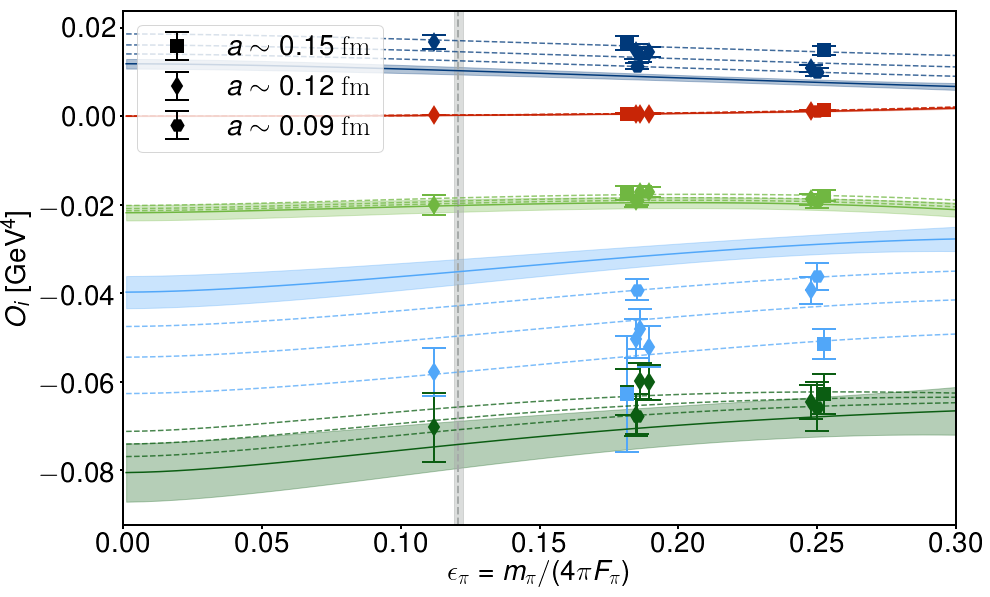

In [15]:
# plot result
def plot_result(epi_data,data_fvcorrected,x_continuum,y_continuum,x_finitelattice,y_finitelattice,oplist,fig_name):
    fig = plt.figure('%s chiral extrapolation' %params['ansatz'],figsize=plot_params['fig_size3'])
    ax = plt.axes(plot_params['plt_axes'])
    dict_e2s = e2s()
    dict_e2m = e2m()
    for oi,op in enumerate(oplist):
        op_color = plot_params['op_color'][op]
        # plot data
        for ens in params['ensembles']:
            a_color = plot_params['alat_color'][dict_e2s[ens]]
            m_shape = plot_params['mpi_shape'][dict_e2m[ens]]
            a_shape = plot_params['a_shape'][dict_e2s[ens]]
            xdata = epi_data[(ens,'epi')].mean
            ydata_mean = data_fvcorrected[(ens,op)].mean
            ydata_sdev = data_fvcorrected[(ens,op)].sdev
            if oi == len(oplist)-1:
                if len(oplist) == 5:
                    clr = 'k'
                else:
                    clr = op_color
                ax.errorbar(x=xdata+100,y=ydata_mean,yerr=ydata_sdev,ls='None',marker=a_shape,\
                            mfc=clr,mec=clr,ecolor=clr,\
                            markersize=plot_params['ms'],elinewidth=plot_params['lw'],\
                            capsize=plot_params['cs'],mew=plot_params['lw'],\
                            label=lbl[ens])
            ax.errorbar(x=xdata,y=ydata_mean,yerr=ydata_sdev,ls='None',marker=a_shape,\
                        mfc=op_color,mec=op_color,ecolor=op_color,\
                        markersize=plot_params['ms'],elinewidth=plot_params['lw'],\
                        capsize=plot_params['cs'],mew=plot_params['lw'])
        a_color = plot_params['alat_color']
        # plot continuum
        x_continuum = x_continuum
        y_continuum_mean = np.array([i.mean for i in y_continuum[op]])
        y_continuum_sdev = np.array([i.sdev for i in y_continuum[op]])
        ax.errorbar(x=x_continuum,y=y_continuum_mean,ls='-',color=op_color)
        ax.fill_between(x_continuum,y_continuum_mean+y_continuum_sdev,y_continuum_mean-y_continuum_sdev,\
                        color=op_color,alpha=0.3)
        # plot finite lattice spacing
        x_finitelattice = x_finitelattice
        y_finitelattice_mean = {alat:np.array([i.mean for i in y_finitelattice[op][alat]]) for alat in ea2label}
        y_finitelattice_sdev = {alat:np.array([i.sdev for i in y_finitelattice[op][alat]]) for alat in ea2label}
        for alat in ea2label:
            ax.errorbar(x=x_finitelattice,y=y_finitelattice_mean[alat],ls='--',color=op_color,alpha=.75)
    # physical pion
    epi_phys = physical_params['mpi']/(4.*np.pi*physical_params['Fpi'])
    ax.axvspan(epi_phys.mean-epi_phys.sdev, epi_phys.mean+epi_phys.sdev, alpha=0.4, color='#a6aaa9')
    ax.axvline(epi_phys.mean,ls='--',color='#a6aaa9',lw=plot_params['lw'])
    yi,yf = ax.get_ylim()[0],ax.get_ylim()[1]
    ax.set_ylim([yi,yf])
    ax.set_xlim([0.0,0.3])
    #print(ax.get_ylim())
    ax.set_xlabel('$\epsilon_\pi=m_\pi/(4\pi F_\pi)$', fontsize=plot_params['fs_xy'])
    if fig_name in ['Bk.pdf']:
        ax.set_ylabel('$B_{K}$', fontsize=plot_params['fs_xy'])
    elif fig_name in ['LR.pdf','S.pdf']:
        opnum = {'LR':1,'S':2}
        ax.set_ylabel('$O^{(\prime)}_%s$ [GeV${}^4$]' %opnum[fig_name.split('.')[0]], fontsize=plot_params['fs_xy'])
    elif fig_name in ['V.pdf']:
        ax.set_ylabel('$O_3$ [GeV${}^4$]', fontsize=plot_params['fs_xy'])
    else:
        ax.set_ylabel('$O_i$ [GeV${}^4$]', fontsize=plot_params['fs_xy'])
    if oplist == ['V'] and fig_name in ['V.pdf']:
        ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.xaxis.set_tick_params(labelsize=plot_params['ts'],width=plot_params['lw'])
    ax.yaxis.set_tick_params(labelsize=plot_params['ts'],width=plot_params['lw'])
    [ax.spines[i].set_linewidth(plot_params['lw']) for i in ax.spines]
    ax.legend(loc=2,fontsize=plot_params['fs_xy'])
    plt.draw()
    if params['save_fig']:
        plt.savefig('./plots/%s' %fig_name,transparent=True)
# plot all operators
if not params['ma_flag']:
    plot_result(epi_data,data_fvcorrected,x_continuum,y_continuum,x_finitelattice,y_finitelattice,params['operators'],'O_i.pdf')
else:
    print("Mixed action fit, skipping plot routines")

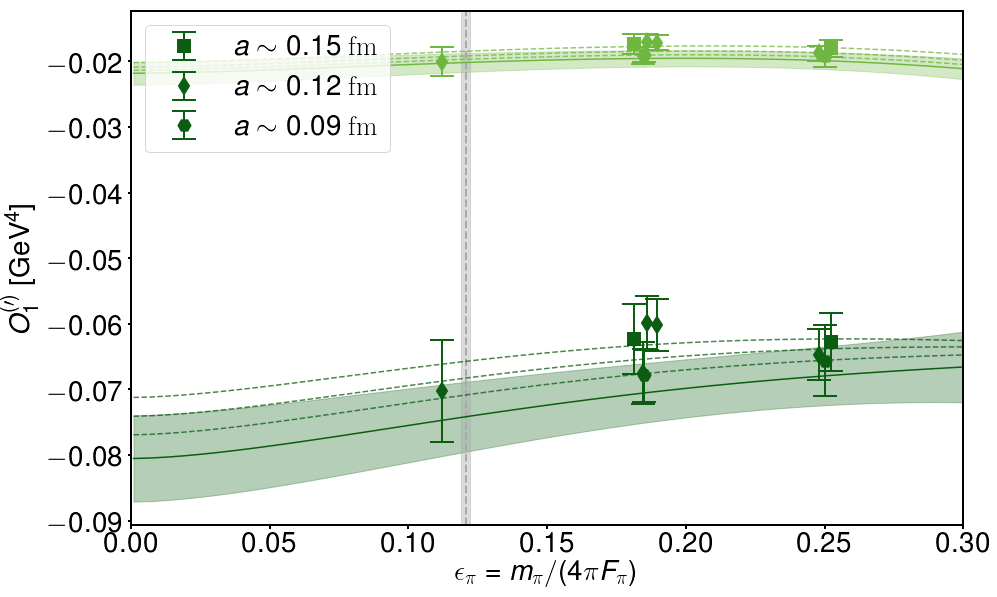

In [16]:
if not params['ma_flag']:
    plot_result(epi_data,data_fvcorrected,x_continuum,y_continuum,x_finitelattice,y_finitelattice,['LR','LR_colormix'],'LR.pdf')
else:
    print("Mixed action fit, skipping plot routines")

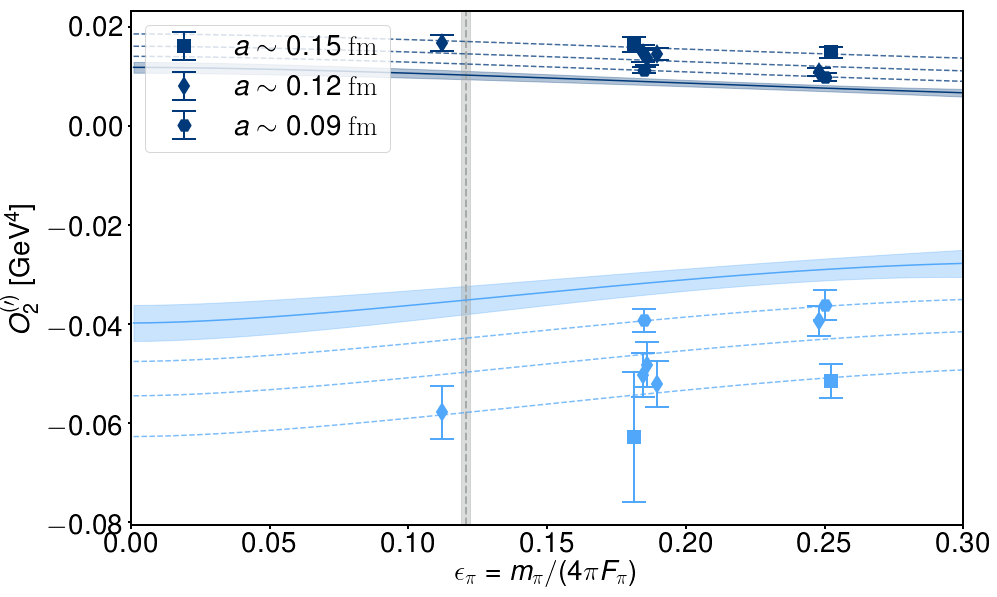

In [17]:
if not params['ma_flag']:
    plot_result(epi_data,data_fvcorrected,x_continuum,y_continuum,x_finitelattice,y_finitelattice,['S','S_colormix'],'S.pdf')
else:
    print("Mixed action fit, skipping plot routines")

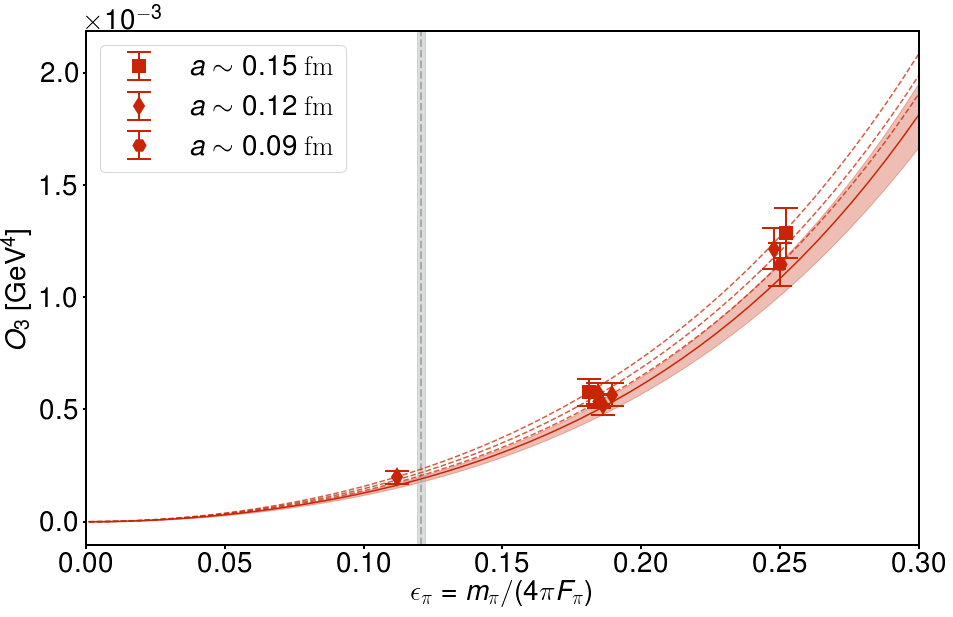

In [18]:
# plot O3
if not params['ma_flag']:
    plot_result(epi_data,data_fvcorrected,x_continuum,y_continuum,x_finitelattice,y_finitelattice,['V'],'V.pdf')
else:
    print("Mixed action fit, skipping plot routines")

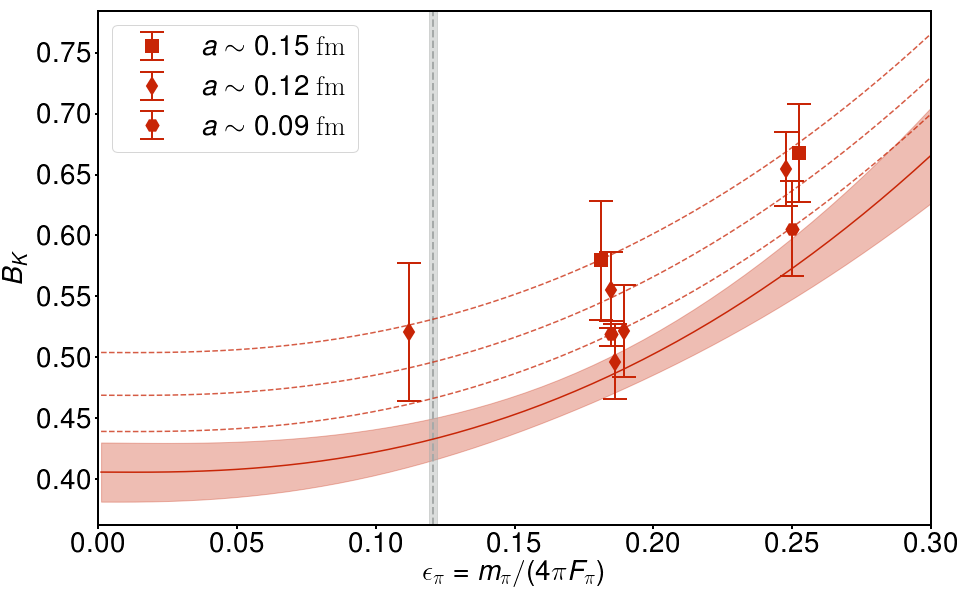

In [19]:
# plot Bk
if not params['ma_flag']:
    plot_result(x_bkdata,y_bkdata,x_bkcontinuum,y_bkcontinuum,x_bkfinitelattice,y_bkfinitelattice,['V'],'Bk.pdf')
else:
    print("Mixed action fit, skipping plot routines")

<center>
    <span style="color: black; font-family: Helvetica; font-size: 2em">
        These calculations were made possible by
    </span>
</center>

| | |
|:---:|:---:|
| [<img src='./data/incite_logo.png' width='200'/>](http://www.doeleadershipcomputing.org/)  | [<img src='./data/olcf_logo.png' width='320'/>](https://www.olcf.ornl.gov/) |
| [<img src='./data/llnl_logo.png' width='640' />](https://hpc.llnl.gov/) | [<img src='./data/scidac_logo.png' width='350' />](http://www.scidac.gov/) |